In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv("BostonHousing.csv")
data.head()
data.rename(columns={"medv":"price"},inplace=True)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
#sns.scatterplot(x=data['feature_name'], y=data['price'])
#plt.show()

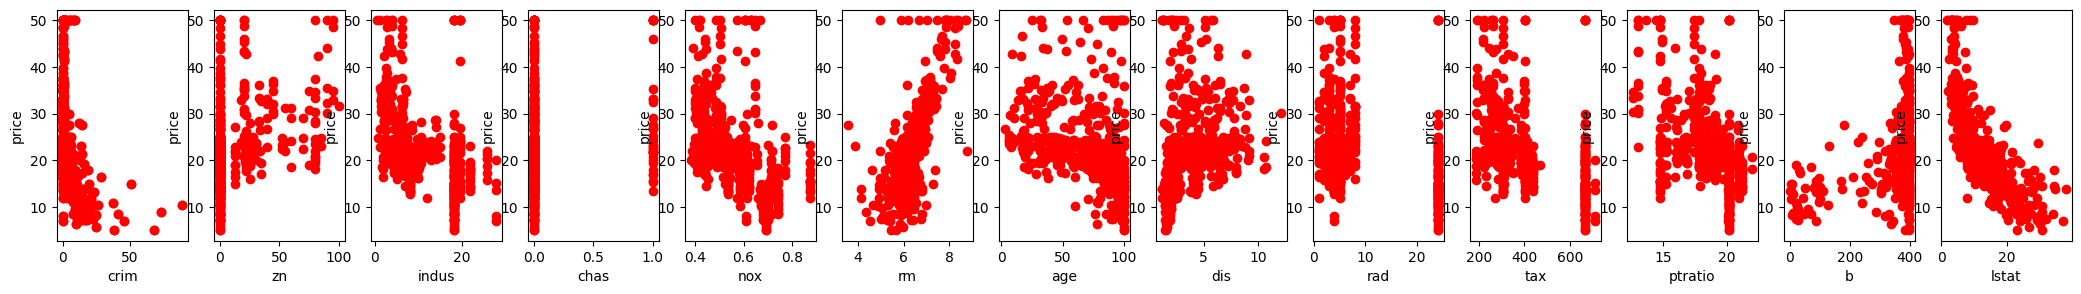

In [4]:
plt.figure(figsize=(26,3))
plt.subplot(1,13,1)
plt.scatter(data["crim"],data["price"],color="red")
plt.xlabel("crim")
plt.ylabel("price")

plt.subplot(1,13,2)
plt.scatter(data["zn"],data["price"],color="red")
plt.xlabel("zn")
plt.ylabel("price")



plt.subplot(1,13,3)
plt.scatter(data["indus"],data["price"],color="red")
plt.xlabel("indus")
plt.ylabel("price")


plt.subplot(1,13,1)
plt.scatter(data["crim"],data["price"],color="red")
plt.xlabel("crim")
plt.ylabel("price")

plt.subplot(1,13,4)
plt.scatter(data["chas"],data["price"],color="red")
plt.xlabel("chas")
plt.ylabel("price")

plt.subplot(1,13,5)
plt.scatter(data["nox"],data["price"],color="red")
plt.xlabel("nox")
plt.ylabel("price")

plt.subplot(1,13,6)
plt.scatter(data["rm"],data["price"],color="red")
plt.xlabel("rm")
plt.ylabel("price")

plt.subplot(1,13,7)
plt.scatter(data["age"],data["price"],color="red")
plt.xlabel("age")
plt.ylabel("price")

plt.subplot(1,13,8)
plt.scatter(data["dis"],data["price"],color="red")
plt.xlabel("dis")
plt.ylabel("price")

plt.subplot(1,13,9)
plt.scatter(data["rad"],data["price"],color="red")
plt.xlabel("rad")
plt.ylabel("price")

plt.subplot(1,13,10)
plt.scatter(data["tax"],data["price"],color="red")
plt.xlabel("tax")
plt.ylabel("price")

plt.subplot(1,13,11)
plt.scatter(data["ptratio"],data["price"],color="red")
plt.xlabel("ptratio")
plt.ylabel("price")

plt.subplot(1,13,12)
plt.scatter(data["b"],data["price"],color="red")
plt.xlabel("b")
plt.ylabel("price")


plt.subplot(1,13,13)
plt.scatter(data["lstat"],data["price"],color="red")
plt.xlabel("lstat")
plt.ylabel("price")

plt.show()

In [5]:
# Calculate the correlation matrix
corr_matrix =data.corr()

# Display the correlation of all features with the target variable 'charges'
print(corr_matrix["price"].sort_values(ascending=False))



price      1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: price, dtype: float64


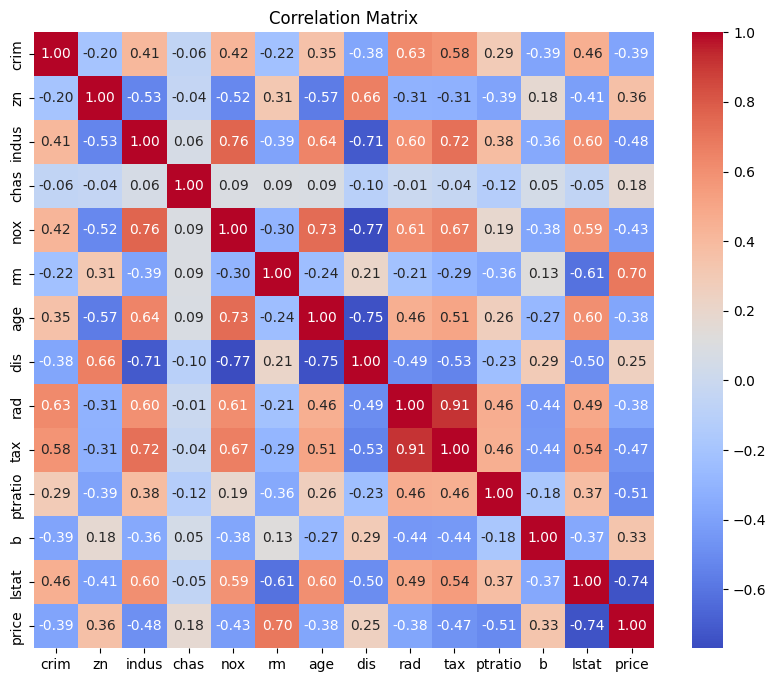

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    Feature         VIF
0     const  645.977937
1      crim    1.831537
2        zn    2.352186
3     indus    3.992503
4      chas    1.095223
5       nox    4.586920
6        rm    2.260374
7       age    3.100843
8       dis    4.396007
9       rad    7.808198
10      tax    9.205542
11  ptratio    1.993016
12        b    1.381463
13    lstat    3.581585
14    price    3.855684


In [8]:
#x=data[["rm","crim","zn","tax","indus"]]
data = data.drop(columns=['tax'])
x=data.iloc[:,0:12]
y=data["price"]


print(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

y_prediction= lr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
r2=r2_score(y_test,y_prediction)
r2



        crim    zn  indus  chas    nox     rm   age     dis  rad  ptratio  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1     15.3   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2     17.8   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2     17.8   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3     18.7   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3     18.7   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...      ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1     21.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1     21.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1     21.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1     21.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1     21.0   

          b  lstat  
0    396.90   4.98  
1    396.90   9.14  
2    392.83 

0.7530242318706903

In [9]:
y_predictions= lr.predict(x_train)
r2_score_new= r2_score(y_train,y_predictions)
r2_score_new

0.7249088878640266

In [54]:
residual=(y_test- y_prediction)
residual

307   -3.303767
343   -4.725146
47    -1.097010
67    -0.195041
362    2.172423
         ...   
92    -5.199135
224    7.895056
110    0.460169
426   -7.209826
443   -2.264145
Name: price, Length: 102, dtype: float64

In [51]:
mse= mean_squared_error(y_test, y_prediction)
mse

24.40797042547858

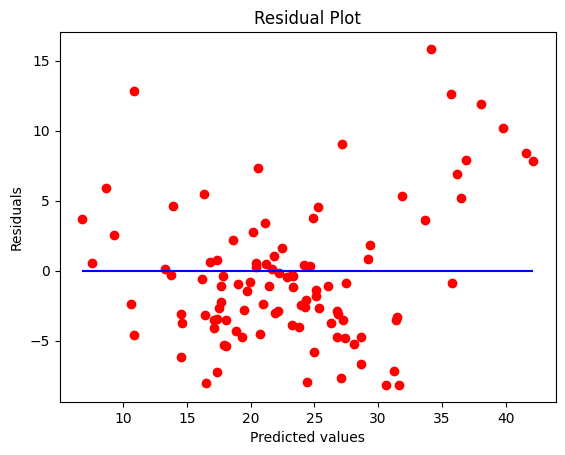

In [55]:
plt.scatter(y_prediction, residual, color="red")
plt.hlines(y=0, xmin=min(y_prediction), xmax=max(y_prediction), color="blue")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

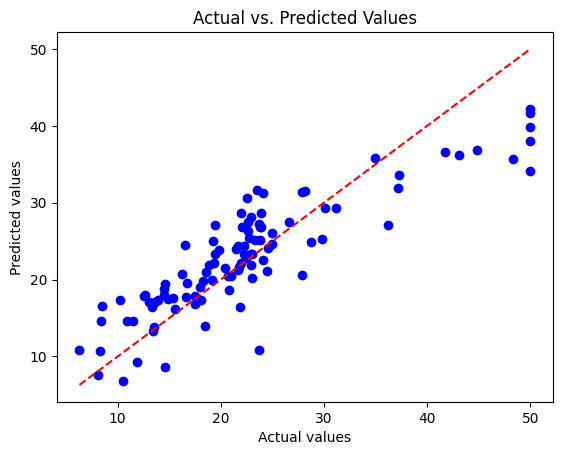

In [56]:
plt.scatter(y_test, y_prediction, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. Predicted Values")
plt.show()